In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading

In [4]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data cleaning and Prep

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
data.duplicated().sum()

3

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()

0

In [21]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualization

<Figure size 720x720 with 0 Axes>

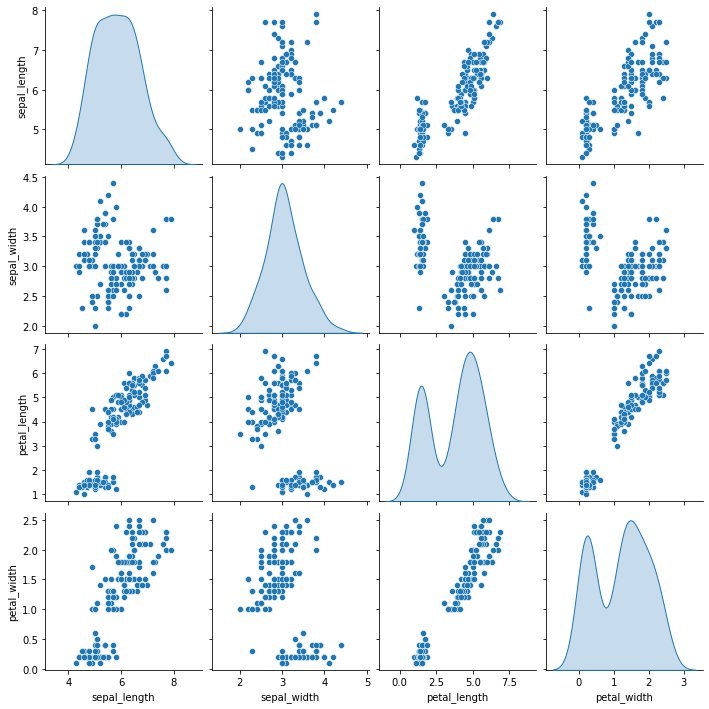

In [22]:
plt.figure(figsize = (10,10))
sns.pairplot(data, diag_kind='kde')

<AxesSubplot:xlabel='species', ylabel='count'>

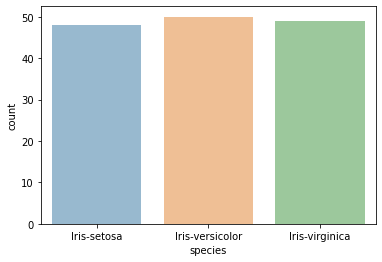

In [26]:
plt.figure()
sns.countplot(data['species'], alpha = 0.5)

In [28]:
l_enc = LabelEncoder()
data['species'] = l_enc.fit_transform(data['species'])

In [29]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
X  = data.drop('species', axis=1)
y = data['species']

### Base model

In [36]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [83]:
result = per_clf.predict([[4.1,2.5,1.3,0.2]])

C:\Users\New user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [85]:
import pickle

In [86]:
with open("model.pkl", "wb") as file:
    pickle.dump(per_clf, file)